In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [7]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


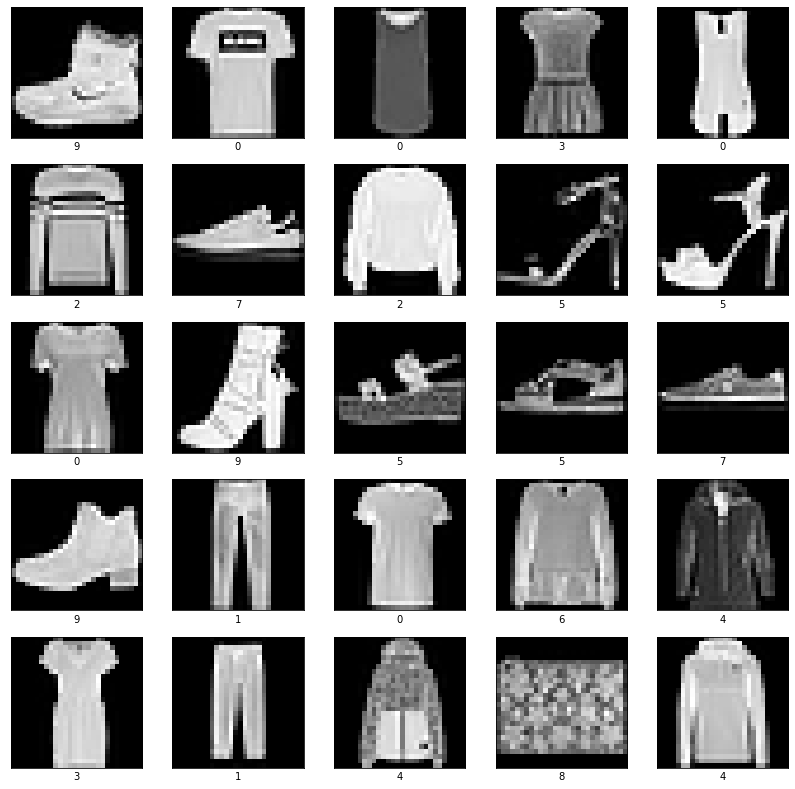

In [12]:
plt.figure(figsize=(14,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [13]:
#     0: T-shirt/top
#     1: Trouser
#     2: Pullover
#     3: Dress
#     4: Coat
#     5: Sandal
#     6: Shirt
#     7: Sneaker
#     8: Bag
#     9: Ankle boot

#### Normlaize

In [14]:
x_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

In [19]:
print(len(set(y_train)))
print(len(set(y_test)))

10
10


In [15]:
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(5000,28,28,1)
x_test = x_test.reshape(1000,28,28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


### Build the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D

### Model-1

In [25]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1) ))
m1.add(MaxPooling2D(pool_size=(2,2)))
       
m1.add(Conv2D(32,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))
       
m1.add(Conv2D(16,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))
       
m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='softmax'))
       
m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])       

In [27]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
157/157 [==============================] - 36s 195ms/step - loss: 1.4449 - accuracy: 0.4882 - val_loss: 0.8965 - val_accuracy: 0.6610
Epoch 2/5
157/157 [==============================] - 32s 203ms/step - loss: 0.7796 - accuracy: 0.7226 - val_loss: 0.7835 - val_accuracy: 0.7140
Epoch 3/5
157/157 [==============================] - 34s 216ms/step - loss: 0.6752 - accuracy: 0.7538 - val_loss: 0.6875 - val_accuracy: 0.7420
Epoch 4/5
157/157 [==============================] - 36s 231ms/step - loss: 0.6174 - accuracy: 0.7788 - val_loss: 0.7074 - val_accuracy: 0.7380
Epoch 5/5
157/157 [==============================] - 29s 187ms/step - loss: 0.5778 - accuracy: 0.7932 - val_loss: 0.6508 - val_accuracy: 0.7650


In [29]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
0,1.444916,0.4882,0.896510,0.661,0
1,0.779552,0.7226,0.783516,0.714,1
2,0.675157,0.7538,0.687484,0.742,2
3,0.617408,0.7788,0.707430,0.738,3
4,0.577806,0.7932,0.650801,0.765,4


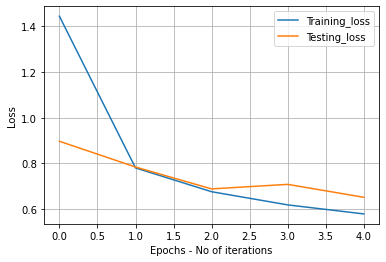

In [30]:
plt.plot(r1['Epochs'],r1['loss'],label='Training_loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing_loss')
plt.xlabel('Epochs - No of iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

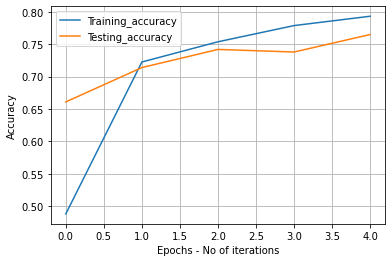

In [31]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training_accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing_accuracy')
plt.xlabel('Epochs - No of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [46]:
print(x_test.shape)

(1000, 28, 28, 1)


In [32]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[[5.6420049e-05 1.1153923e-08 2.7968414e-05 ... 3.2309169e-01
  1.1020500e-03 5.2501231e-01]
 [6.2580891e-03 1.9634981e-05 9.2179930e-01 ... 6.7362577e-10
  6.9350976e-04 1.6178809e-09]
 [2.5572449e-08 9.9993348e-01 2.1903243e-05 ... 1.6339227e-16
  3.8517688e-14 1.5814300e-13]
 ...
 [5.4623019e-03 1.0968151e-03 2.4186265e-01 ... 4.1775445e-07
  5.9925038e-03 1.2128335e-06]
 [5.9231726e-04 6.9484008e-06 5.7868590e-04 ... 6.6542095e-01
  4.6490782e-04 8.7776110e-03]
 [1.4158410e-05 5.4752491e-09 6.5696449e-06 ... 9.8280543e-01
  5.3124859e-05 1.0003422e-02]]


In [35]:
print(sum(ypred_m1[0]))
print(sum(ypred_m1[23]))

1.0000000788028212
1.0000000259450532


In [36]:
ypred_m1 = [np.argmax(i) for i in ypred_m1]
print(ypred_m1)

[9, 2, 1, 1, 2, 1, 6, 2, 5, 7, 2, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5, 1, 2, 2, 3, 7, 3, 8, 5, 1, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 4, 7, 2, 1, 4, 2, 2, 2, 5, 2, 2, 2, 8, 2, 8, 0, 7, 7, 8, 5, 1, 1, 3, 3, 9, 8, 7, 0, 2, 4, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 4, 7, 1, 8, 0, 1, 2, 2, 3, 4, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 4, 5, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 2, 0, 0, 1, 2, 1, 3, 2, 2, 2, 2, 1, 4, 5, 2, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 9, 4, 2, 3, 5, 4, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 8, 7, 9, 9, 4, 4, 7, 1, 2, 1, 2, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 5, 4, 1, 8, 4, 1, 3, 1, 2, 7, 4, 8, 5, 3, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 2, 4, 2, 4, 9, 7, 3, 5, 5, 4, 8, 5, 2, 3, 0, 4, 8, 0, 0, 2, 3, 4, 7, 6, 1, 2, 0, 3, 3, 0, 8, 3, 7, 4, 0, 1, 2, 3, 0, 4, 2, 7, 5, 3, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 2, 8, 0, 0, 2, 9, 5, 9, 1, 3, 2, 4, 2, 4, 7, 1, 2, 4, 8, 2, 6, 5, 2, 4, 7, 7, 7, 3, 3, 7, 2, 

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[ 72   2   7  17   1   2   4   0   2   0]
 [  0 101   1   3   0   0   0   0   0   0]
 [  1   0  87   4  17   0   2   0   0   0]
 [  2   5  10  74   1   0   1   0   0   0]
 [  0   0  24   7  83   0   1   0   0   0]
 [  0   0   0   0   0  82   0   3   0   2]
 [ 12   0  39   9  22   0  13   0   2   0]
 [  0   0   0   0   0   6   0  84   0   5]
 [  0   0   3   1   3   6   0   0  82   0]
 [  0   0   0   1   0   1   0   6   0  87]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       107
           1       0.94      0.96      0.95       105
           2       0.51      0.78      0.62       111
           3       0.64      0.80      0.71        93
           4       0.65      0.72      0.69       115
           5       0.85      0.94      0.89        87
           6       0.62      0.13      0.22        97
           7       0.90      0.88      0.89        95
           8       0.95      0.86      0.91        95
           9       0.93     

In [38]:
m1.save('m1_18Jun.h5')

In [42]:
from tensorflow.keras.models import load_model

In [44]:
loaded_model = load_model('m1_18Jun.h5')

In [45]:
print(loaded_model.predict(x_test))

[[5.6420049e-05 1.1153923e-08 2.7968414e-05 ... 3.2309169e-01
  1.1020500e-03 5.2501231e-01]
 [6.2580891e-03 1.9634981e-05 9.2179930e-01 ... 6.7362577e-10
  6.9350976e-04 1.6178809e-09]
 [2.5572449e-08 9.9993348e-01 2.1903243e-05 ... 1.6339227e-16
  3.8517688e-14 1.5814300e-13]
 ...
 [5.4623019e-03 1.0968151e-03 2.4186265e-01 ... 4.1775445e-07
  5.9925038e-03 1.2128335e-06]
 [5.9231726e-04 6.9484008e-06 5.7868590e-04 ... 6.6542095e-01
  4.6490782e-04 8.7776110e-03]
 [1.4158410e-05 5.4752491e-09 6.5696449e-06 ... 9.8280543e-01
  5.3124859e-05 1.0003422e-02]]


In [ ]:
# pip install streamlit 
# pip install streamlit_drawable_canvas 

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train1,y_train1),(x_test1,y_test1) = mnist.load_data()
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


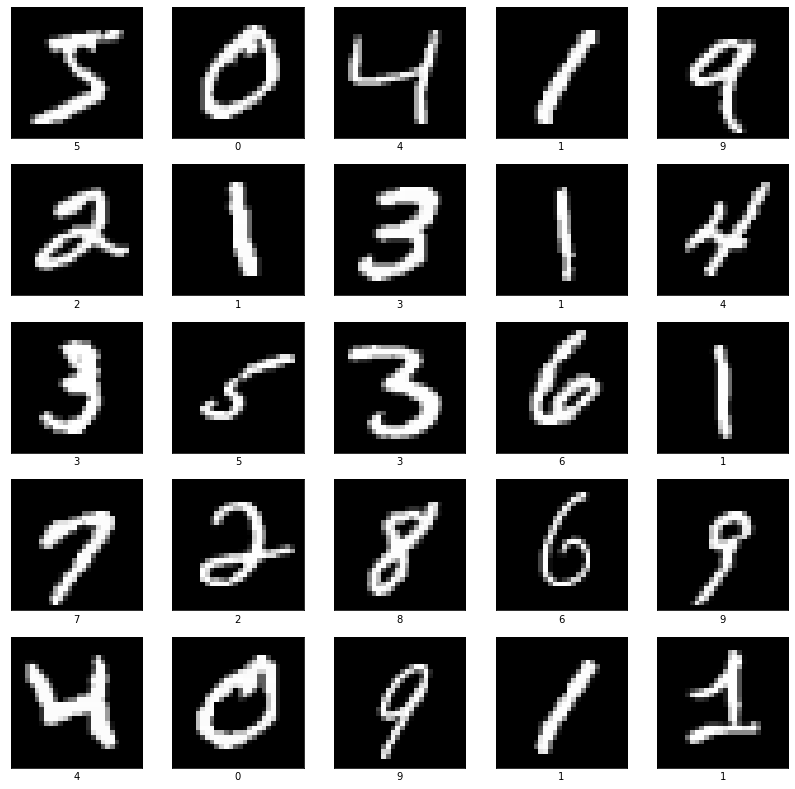

In [6]:
plt.figure(figsize=(14,14))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train1[i],cmap='gray')
    plt.xlabel(y_train1[i])
plt.show()